In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)
from numpy.random import seed
from tensorflow import set_random_seed
from sklearn.datasets import load_boston
from keras import optimizers
from keras import initializers
from keras import layers
import matplotlib.pyplot as plt

In [30]:
x,y = load_boston(return_X_y=True)
x = preprocessing.MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle = True, random_state=42)
n_features = x.shape[1]
print(x.shape)

(506, 13)


Error:  544.1288061084862


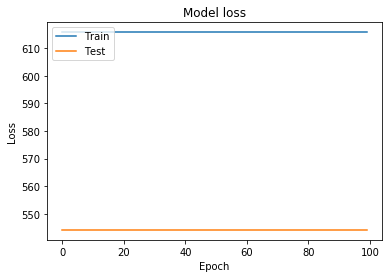

In [41]:
import keras.backend as K
K.clear_session()
seed(0)
set_random_seed(0)

model = Sequential()
init = initializers.he_uniform()
model.add(Dense(15, input_dim = n_features, activation='relu', kernel_initializer=init, bias_initializer='zeros'))
model.add(Dense(10,  activation='relu', kernel_initializer=init, bias_initializer='zeros'))
model.add(Dense(1, activation='relu', kernel_initializer=init, bias_initializer='zeros'))

# compile the model
opt = optimizers.Adam(lr=0.05, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='mse')

# fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data =(x_test,y_test),verbose=0, callbacks=[tensorboard])#callbacks=[tensorboard]

# evaluate the model
error = model.evaluate(x_test, y_test, verbose=0)
print('Error: ', error)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
pred = model.predict(x_test)

for i in range(50):
    print(pred[i])

[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]
[-0.]


In [40]:
import time
from keras.callbacks import TensorBoard

NAME = "Boston-Regression-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME), write_grads=True, histogram_freq=2)

/Users/annajurek/anaconda3/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Error:  12.323041978710426


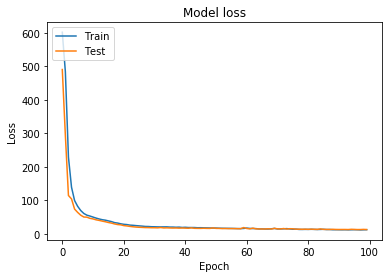

In [39]:
seed(0)
set_random_seed(0)

model = Sequential()
lReLu = layers.LeakyReLU(alpha=0.01)
init = initializers.he_uniform()
model.add(Dense(15, input_dim = n_features, activation=lReLu, kernel_initializer=init, bias_initializer='zeros'))
model.add(Dense(10,  activation=lReLu, kernel_initializer=init, bias_initializer='zeros'))
model.add(Dense(1, activation=lReLu, kernel_initializer=init, bias_initializer='zeros'))

# compile the model
opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='mse')

# fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data =(x_test,y_test),verbose=0)#callbacks=[tensorboard]

# evaluate the model
error = model.evaluate(x_test, y_test, verbose=0)
print('Error: ', error)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()